# Vehicle Emissions using Regression

The data consist of 12 features: 
- Make: Vehicle maker
- Model: Vehicle model
- Vehicle Class: Class of vehicle depending on their utility, capacity and weight
- Engine Size: Size of engine used in Litre
- Cylinders: Number of engine cylinders
- Transmission: Type of transmission with number of gears
- Fuel type: type of fuel used
- Fuel Consumption in the city: Fuel consumption in city roads (L/100 km)
- Fuel Consumption on the highway: Fuel consumption in highways (L/100 km)
- Combined Fuel consumption: The combined fuel consumption (55% city, 45% highway) is shown in L/100 km
- Combined Fuel consumption: The combined fuel consumption in both city and highway is shown in mile per gallon(mpg)
- CO2 Emissions: The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

Some features are abbriviated 
- Model
    - 4WD/4X4 = Four-wheel drive
    - AWD = All-wheel drive
    - FFV = Flexible-fuel vehicle
    - SWB = Short wheelbase
    - LWB = Long wheelbase
    - EWB = Extended wheelbase
- Transmission
    - A = Automatic
    - AM = Automated manual
    - AS = Automatic with select shift
    - AV = Continuously variable
    - M = Manual
    - 3 - 10 = Number of gears
- Fuel Type
    - X = Regular gasoline
    - Z = Premium gasoline
    - D = Diesel
    - E = Ethanol (E85)
    - N = Natural gas

 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("CO2 Emissions_Canada.csv")
df_copy = df # maybe for later use in other experiments

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Visualizations

Lets compare average emissions based on vehicle class

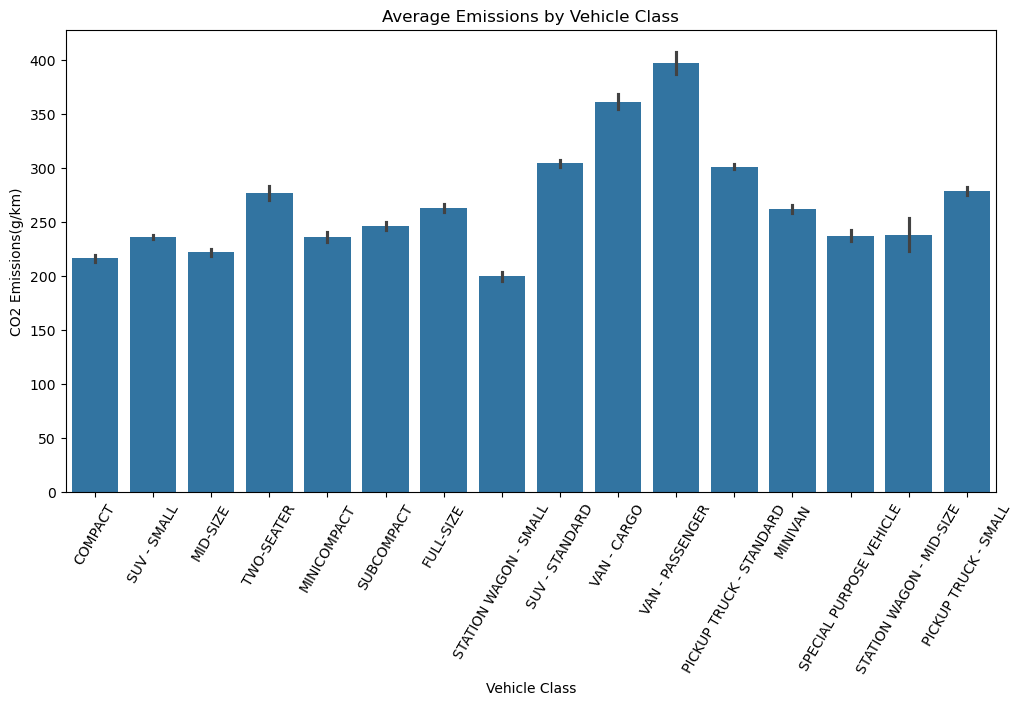

In [4]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Vehicle Class', y='CO2 Emissions(g/km)')
plt.title('Average Emissions by Vehicle Class')
plt.xticks(rotation=60)
plt.show()

Now what about average emissions based on vehicle makers

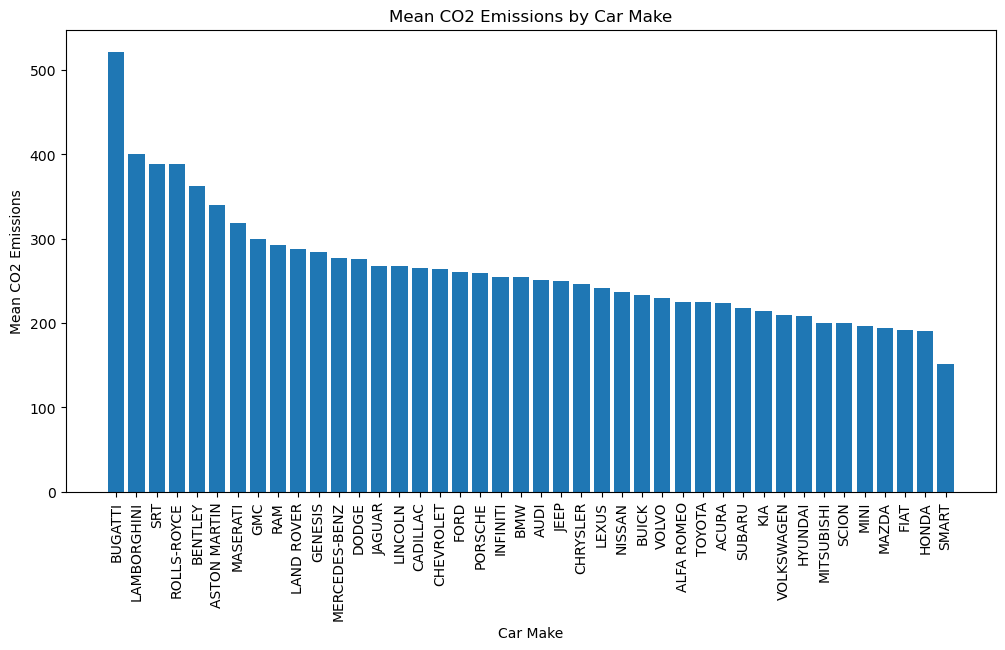

In [5]:
plt.figure(figsize = (12, 6))
mean_emissions_by_make = df.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False)
plt.bar(mean_emissions_by_make.index, mean_emissions_by_make)
plt.title("Mean CO2 Emissions by Car Make")
plt.xlabel("Car Make")
plt.ylabel("Mean CO2 Emissions")
plt.xticks(rotation = 90)   
plt.show()

# Data preprocessing

In [6]:
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

We can see we have a few catagotial features, lets turn them into numerical so they work with our linear regression model

In [7]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

No nulls, good

In [8]:
df['Make'].nunique()

42

In [9]:
df['Model'].nunique()

2053

We can see that if we combine the `make` and `model` features, we would end up creating 2K+ new features. That would definitely impact model performance, so let's just keep the `make` feature and drop the `model` one, then encode it to transform it from categorical to numerical.

In [10]:
df = df.drop(columns=['Model'])
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
df_m_dummies = pd.get_dummies(df['Make'])
df_m_dummies = df_m_dummies.astype(int)
df = pd.concat([df, df_m_dummies], axis=1)
df.drop(['Make'], axis = 1, inplace = True)
df.head()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),...,PORSCHE,RAM,ROLLS-ROYCE,SCION,SMART,SRT,SUBARU,TOYOTA,VOLKSWAGEN,VOLVO
0,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,...,0,0,0,0,0,0,0,0,0,0
1,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,...,0,0,0,0,0,0,0,0,0,0
2,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,...,0,0,0,0,0,0,0,0,0,0
3,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,...,0,0,0,0,0,0,0,0,0,0
4,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,...,0,0,0,0,0,0,0,0,0,0


Now we transform the `Vehicle Class` feature

In [12]:
df_vc_dummies = pd.get_dummies(df['Vehicle Class'])
df_vc_dummies = df_vc_dummies.astype(int)
df = pd.concat([df, df_vc_dummies], axis=1)
df.drop(['Vehicle Class'], axis = 1, inplace = True)
df.head()

,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),ACURA,...,PICKUP TRUCK - STANDARD,SPECIAL PURPOSE VEHICLE,STATION WAGON - MID-SIZE,STATION WAGON - SMALL,SUBCOMPACT,SUV - SMALL,SUV - STANDARD,TWO-SEATER,VAN - CARGO,VAN - PASSENGER
0,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,1,...,0,0,0,0,0,0,0,0,0,0
1,2.4,4,M6,Z,11.2,7.7,9.6,29,221,1,...,0,0,0,0,0,0,0,0,0,0
2,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,1,...,0,0,0,0,0,0,0,0,0,0
3,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,1,...,0,0,0,0,0,1,0,0,0,0
4,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,1,...,0,0,0,0,0,1,0,0,0,0


Lets label enocde the last remaining catagorical features, `Transmission` and `Fuel Type`. Ill start with `fuel type`.

In [13]:
label_encoder = LabelEncoder()
df['Fuel Type'] = label_encoder.fit_transform(df['Fuel Type'])
df.head()

,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),ACURA,...,PICKUP TRUCK - STANDARD,SPECIAL PURPOSE VEHICLE,STATION WAGON - MID-SIZE,STATION WAGON - SMALL,SUBCOMPACT,SUV - SMALL,SUV - STANDARD,TWO-SEATER,VAN - CARGO,VAN - PASSENGER
0,2.0,4,AS5,4,9.9,6.7,8.5,33,196,1,...,0,0,0,0,0,0,0,0,0,0
1,2.4,4,M6,4,11.2,7.7,9.6,29,221,1,...,0,0,0,0,0,0,0,0,0,0
2,1.5,4,AV7,4,6.0,5.8,5.9,48,136,1,...,0,0,0,0,0,0,0,0,0,0
3,3.5,6,AS6,4,12.7,9.1,11.1,25,255,1,...,0,0,0,0,0,1,0,0,0,0
4,3.5,6,AS6,4,12.1,8.7,10.6,27,244,1,...,0,0,0,0,0,1,0,0,0,0


We now do the same thing to the transmission feature. The transmission feature is a bit to convoluted, its either a manual or an automatic, gears should not matter here. Lets change the feature

In [14]:
# Transmission either starts with A for automatic or M for manual, so lets use that 
# Make a new feature colomn based on the first letter of the transmission feature 
# which is either A or M 
df['Transmission_Type'] = df['Transmission'].str[0]
df['Transmission'] = label_encoder.fit_transform(df['Transmission_Type'])
# lets drop the new column since we dont need it
df = df.drop(columns=['Transmission_Type'])
df.head()

,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),ACURA,...,PICKUP TRUCK - STANDARD,SPECIAL PURPOSE VEHICLE,STATION WAGON - MID-SIZE,STATION WAGON - SMALL,SUBCOMPACT,SUV - SMALL,SUV - STANDARD,TWO-SEATER,VAN - CARGO,VAN - PASSENGER
0,2.0,4,0,4,9.9,6.7,8.5,33,196,1,...,0,0,0,0,0,0,0,0,0,0
1,2.4,4,1,4,11.2,7.7,9.6,29,221,1,...,0,0,0,0,0,0,0,0,0,0
2,1.5,4,0,4,6.0,5.8,5.9,48,136,1,...,0,0,0,0,0,0,0,0,0,0
3,3.5,6,0,4,12.7,9.1,11.1,25,255,1,...,0,0,0,0,0,1,0,0,0,0
4,3.5,6,0,4,12.1,8.7,10.6,27,244,1,...,0,0,0,0,0,1,0,0,0,0


Now Automatic will be 0 and Manual is 1

Finally, since all the data is using the metric system, lets just get rid of the `Fuel Consumption Comb (mpg)` feature, its the only non metric feature

In [15]:
df.drop(['Fuel Consumption Comb (mpg)'], axis = 1, inplace = True)
df.head()

,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),ACURA,ALFA ROMEO,...,PICKUP TRUCK - STANDARD,SPECIAL PURPOSE VEHICLE,STATION WAGON - MID-SIZE,STATION WAGON - SMALL,SUBCOMPACT,SUV - SMALL,SUV - STANDARD,TWO-SEATER,VAN - CARGO,VAN - PASSENGER
0,2.0,4,0,4,9.9,6.7,8.5,196,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.4,4,1,4,11.2,7.7,9.6,221,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.5,4,0,4,6.0,5.8,5.9,136,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3.5,6,0,4,12.7,9.1,11.1,255,1,0,...,0,0,0,0,0,1,0,0,0,0
4,3.5,6,0,4,12.1,8.7,10.6,244,1,0,...,0,0,0,0,0,1,0,0,0,0


# Experiments

###  Experiment 1: Linear regression

In [16]:
X = df.drop('CO2 Emissions(g/km)', axis =1)
y = df['CO2 Emissions(g/km)']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [18]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

y_hat = lr_model.predict(X_test)

In [19]:
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r_squared = r2_score(y_test, y_hat)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) coefficient of determination:", r_squared)

Mean Absolute Error (MAE): 11.445503712245443
Mean Squared Error (MSE): 270.48166426905925
R-squared (R²) coefficient of determination: 0.9213630920819551


In [20]:
print(lr_model.score(X_test, y_test))

0.9213630920819551


In [21]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

Lets see some predictions compared to actual values. 

In [22]:
df_results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_test_pred})
print(df_results)

      Actual   Predicted
0        253  251.629250
1        344  317.101600
2        322  333.647076
3        297  303.092830
4        308  282.031853
...      ...         ...
1472     221  222.973429
1473     260  243.576048
1474     184  180.619988
1475     235  248.423866
1476     193  206.248742

[1477 rows x 2 columns]


It seems like it did fairly well, though some errors are present

# Experiment 2: 2k+ features?

I dont know about keeping this as an experiment, just wanted to thow it in here 

In [23]:
# Create a column that combines Make and Model
df_copy['Make Model'] = df_copy['Make'] + ' ' + df_copy['Model']
df_copy.drop(['Make', 'Model'], axis = 1, inplace = True)
df_copy = df_copy[['Make Model', 'Vehicle Class',  'Engine Size(L)', 'Cylinders',	
         'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)'
         , 'CO2 Emissions(g/km)']]
df_copy.head()

,Make Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,ACURA ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,ACURA ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,ACURA MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,ACURA RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


In [24]:
df_mm_dummies = pd.get_dummies(df_copy['Make Model'])
df_mm_dummies = df_mm_dummies.astype(int)
df_copy = pd.concat([df_copy, df_mm_dummies], axis=1)
df_copy.drop(['Make Model'], axis = 1, inplace = True)
df_copy.head()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),ACURA ILX,...,VOLVO XC60 T6 AWD,VOLVO XC70 3.2 AWD,VOLVO XC70 AWD,VOLVO XC70 T5,VOLVO XC70 T5 AWD,VOLVO XC70 T6 AWD,VOLVO XC90 AWD,VOLVO XC90 T5,VOLVO XC90 T5 AWD,VOLVO XC90 T6 AWD
0,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196,1,...,0,0,0,0,0,0,0,0,0,0
1,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221,1,...,0,0,0,0,0,0,0,0,0,0
2,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136,0,...,0,0,0,0,0,0,0,0,0,0
3,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255,0,...,0,0,0,0,0,0,0,0,0,0
4,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_vc_dummies = pd.get_dummies(df_copy['Vehicle Class'])
df_vc_dummies = df_vc_dummies.astype(int)
df_copy = pd.concat([df_copy, df_vc_dummies], axis=1)
df_copy.drop(['Vehicle Class'], axis = 1, inplace = True)
df_copy.head()

,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),ACURA ILX,ACURA ILX HYBRID,...,PICKUP TRUCK - STANDARD,SPECIAL PURPOSE VEHICLE,STATION WAGON - MID-SIZE,STATION WAGON - SMALL,SUBCOMPACT,SUV - SMALL,SUV - STANDARD,TWO-SEATER,VAN - CARGO,VAN - PASSENGER
0,2.0,4,AS5,Z,9.9,6.7,8.5,196,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.4,4,M6,Z,11.2,7.7,9.6,221,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.5,4,AV7,Z,6.0,5.8,5.9,136,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3.5,6,AS6,Z,12.7,9.1,11.1,255,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3.5,6,AS6,Z,12.1,8.7,10.6,244,0,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
label_encoder = LabelEncoder()
df_copy['Fuel Type'] = label_encoder.fit_transform(df_copy['Fuel Type'])
df_copy.head()

,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),ACURA ILX,ACURA ILX HYBRID,...,PICKUP TRUCK - STANDARD,SPECIAL PURPOSE VEHICLE,STATION WAGON - MID-SIZE,STATION WAGON - SMALL,SUBCOMPACT,SUV - SMALL,SUV - STANDARD,TWO-SEATER,VAN - CARGO,VAN - PASSENGER
0,2.0,4,AS5,4,9.9,6.7,8.5,196,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.4,4,M6,4,11.2,7.7,9.6,221,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.5,4,AV7,4,6.0,5.8,5.9,136,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3.5,6,AS6,4,12.7,9.1,11.1,255,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3.5,6,AS6,4,12.1,8.7,10.6,244,0,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
df_copy['Transmission_Type'] = df_copy['Transmission'].str[0]
df_copy['Transmission'] = label_encoder.fit_transform(df_copy['Transmission_Type'])
df_copy = df_copy.drop(columns=['Transmission_Type'])
df_copy.head()

,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),ACURA ILX,ACURA ILX HYBRID,...,PICKUP TRUCK - STANDARD,SPECIAL PURPOSE VEHICLE,STATION WAGON - MID-SIZE,STATION WAGON - SMALL,SUBCOMPACT,SUV - SMALL,SUV - STANDARD,TWO-SEATER,VAN - CARGO,VAN - PASSENGER
0,2.0,4,0,4,9.9,6.7,8.5,196,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.4,4,1,4,11.2,7.7,9.6,221,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.5,4,0,4,6.0,5.8,5.9,136,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3.5,6,0,4,12.7,9.1,11.1,255,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3.5,6,0,4,12.1,8.7,10.6,244,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
X = df_copy.drop('CO2 Emissions(g/km)', axis =1)
y = df_copy['CO2 Emissions(g/km)']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [30]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

y_hat = lr_model.predict(X_test)

In [31]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [32]:
df_results_e2 = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_test_pred})
print(df_results_e2)

      Actual   Predicted
0        253  253.000000
1        344  330.054443
2        322  322.099609
3        297  292.178223
4        308  318.076172
...      ...         ...
1472     221  220.999756
1473     260  256.461426
1474     184  179.787109
1475     235  251.592529
1476     193  185.655273

[1477 rows x 2 columns]


In [33]:
print(lr_model.score(X_test, y_test))

-2.418295343867058e+19


A negative score, hmmm. Our predictions and actual values seem to look fine, but i suspect it because of the number of features that out score is negative